## 地理数据可视化basemap
数据科学中一种常见的可视化类型是地理数据。 Matplotlib用于这种类型的可视化的主要工具是底图工具包，它是mpl_toolkits命名空间下的几个Matplotlib工具包之一。诚然，底图的使用有点笨拙，而且即使是简单的可视化效果，渲染时间通常也比您希望的长得多。对于更密集的地图可视化，更现代的解决方案（例如传单或Google Maps API）可能是更好的选择。尽管如此，底图仍然是Python用户在其虚拟工具栏中拥有的有用工具。在本节中，我们将显示此工具包可能提供的几种地图可视化类型的示例。

 
basemap的安装非常简单；如果您使用的是conda，则可以输入以下内容，然后将下载软件包：

>conda install basemap
或者
>pip install --user git+https://github.com/matplotlib/basemap.git 

也可以源码安装:https://github.com/matplotlib/basemap

或者下载whl包进行 pip离线安装

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

一旦安装并导入了底图工具包，地理图就在几行之内（以下图形也需要Python 2中的PIL包或Python 3中的pillow包）：

In [17]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

<Figure size 576x576 with 0 Axes>

即将讨论底图的参数的含义。

有用的是，此处显示的地球不仅仅是一张图像；它是功能齐全的Matplotlib轴，可以理解球面坐标，并允许我们在地图上轻松绘制数据！例如，我们可以使用其他地图投影，放大到北美，然后绘制西雅图的位置。我们将使用etopo图像（显示陆地和海洋下的地形特征）作为地图背景：

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


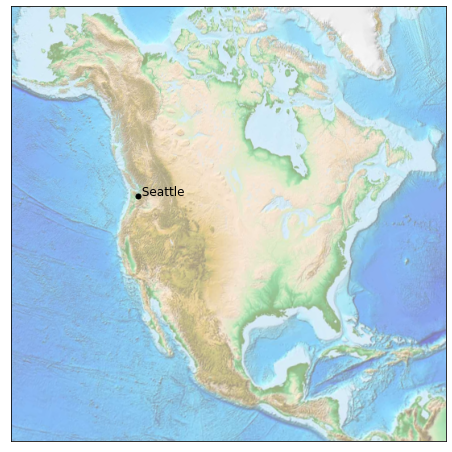

In [4]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

 
这使您可以简要了解仅需几行Python即可实现的地理可视化。现在，我们将更深入地讨论底图的功能，并提供一些可视化地图数据的示例。使用这些简短的示例作为构建块，您应该几乎可以创建所需的任何地图可视化。

### 地图投影
确定何时使用地图的第一件事是要使用哪种投影。您可能已经熟悉这样一个事实，即不可能在不以某种方式扭曲或破坏其连续性的情况下将球形地图（例如地球的地图）投影到平坦的表面上。这些预测是在人类历史上发展而来的，有很多选择！根据地图投影的预期用途，有一些对维护有用的地图特征（例如，方向，区域，距离，形状或其他注意事项）。

底图包实现了数十个此类投影，所有这些投影均由短格式代码引用。在这里，我们将简要演示一些更常见的示例。

 
我们将从定义一个便利方法开始，以绘制我们的世界地图以及经度和纬度线：

In [13]:
from itertools import chain
## 对切割线处理
def draw_map(m, scale=0.2):
    # 阴影浮雕图像
    m.shadedrelief(scale=scale)
    
    # lats和longs作为字典返回
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # 键包含plt.Line2D实例 是一个包含元组的二维元组，tup[1][0]才是我们需要的
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    #  在这些行中循环并设置所需的样式
    for line in all_lines:
        line.set(linestyle='--', alpha=0.3, color='b')

### 圆柱投影
最简单的地图投影是圆柱投影，其中恒定纬度和经度的线分别映射到水平线和垂直线。这种类型的映射很好地表示了赤道区域，但是会导致极点附近的极端失真。纬线的间距在不同的圆柱投影之间变化，从而导致不同的守恒特性和极点附近的不同变形。在下图中，我们展示了等距圆柱投影的示例，该投影选择了保留沿子午线距离的纬度缩放比例。其他圆柱投影是墨卡托投影（projection='merc'）和圆柱相等面积（projection='cea'）投影。


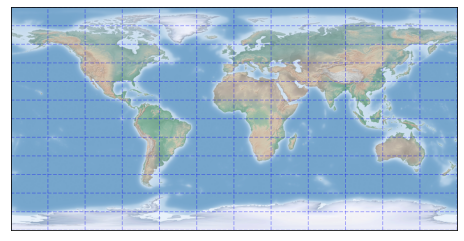

In [14]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

此视图的底图附加参数指定所需地图的左下角（llcrnr）和右上角（urcrnr）的纬度（lat）和经度（lon），以度为单位
### 伪圆柱投影
伪圆柱投影放宽了子午线（经度恒定的线）保持垂直的要求；这样可以在投影的极点附近提供更好的属性。莫尔维德投影（projection ='moll'）是一个常见的例子，其中所有子午线都是椭圆弧。构造它是为了保留整个地图上的区域：尽管两极附近存在变形，但是小块区域却反映了真实区域。其他伪圆柱投影是正弦（projection=“ sinu”）和鲁滨逊（projection=“ robin”）投影。

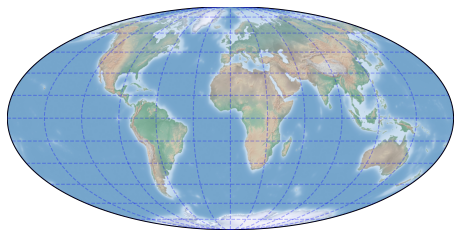

In [15]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)